# Prática 2: Exploração de Dados - Parte II

### Lucas Yudi Sugi - 9293251
### Kelvin Guilherme de Oliveira - 9293286

Este trabalho tem como objetivo reanalisar as perguntas elaboradas na prática anterior, a fim de verificar se existe a possibilidade de melhorá-las, e, além disso, utilizar outras medidas estatísticas com a finalidade de obter uma resposta ainda melhor para as perguntas.

### -------------------------------------------------------------------------------------------------------------------------------------------

## Dataset 1: Diabetes

### Reavaliação das perguntas

1 - Como a progressão da doença é impactada pelo sexo do paciente ?<br>
2 - Como a progressão da doença é impactada pela faixa etária do paciente ?<br>
3 - Qual medida está mais correlacionada com a progressão da doença ?<br>

Na etapa anterior, sugerimos hipóteses para todas essas questões, ou seja, ainda não há nada conclusivo. Certamente temos evidências muito fortes do que desejamos, mas para que haja uma maior certeza é necessário obter outras medidas exploratórias. Sendo assim, nesse trabalho utilizaremos outras estatísticas descritivas, para melhor entender o dataset e também procurar por outliers nos dados.

Para a reanálise do dataset, utilizaremos os mesmos atributos já definidos anteriomente:

Age <br>
Sex<br>
Ldl (S1)<br>
Hdl (S2)<br>
Glu (S3)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Leitura dos dados
dataset = pd.read_table('./datasets/diabetes/diabetes.tab.txt')

#Apresentação de alguns dados
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## Medida: Boxplot

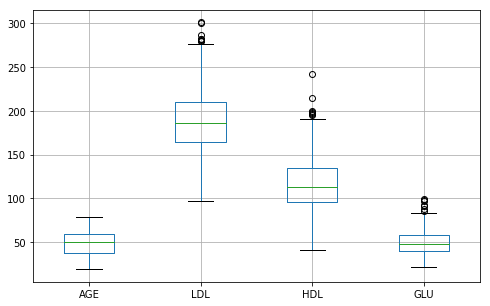

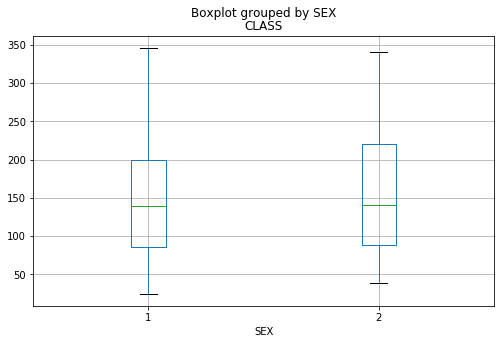

In [2]:
#Extraindo o dataset necessário
diabete = dataset[['AGE','SEX','S1','S2','S3','Y']].copy()

#Renomeando colunas
diabete.columns = ['AGE','SEX','LDL','HDL','GLU','CLASS']

#Plotando boxplot por atributo
diabete.boxplot(column=diabete.columns[[0,2,3,4]].tolist(),figsize=(8,5))
plt.show()

diabete.boxplot(column=diabete.columns[[5]].tolist(),figsize=(8,5),by='SEX')
plt.show()

In [3]:
#Analisando os outliers - LDL
dist = (1.5*(diabete.LDL.quantile(q=0.75)-diabete.LDL.quantile(q=0.25))) + diabete.LDL.quantile(q=0.75)

print("Máximo do boxplot para LDL:", dist)

diabete[diabete.LDL > dist]

Máximo do boxplot para LDL: 278.0


,AGE,SEX,LDL,HDL,GLU,CLASS
123,50,2,300,242.4,33.0,84
161,36,2,286,199.4,39.0,217
202,71,2,281,173.6,55.0,196
230,38,2,301,215.0,50.0,220
248,37,1,282,197.2,43.0,258
276,52,1,280,174.0,67.0,283
287,61,1,280,195.4,55.0,219
346,50,2,282,196.8,44.0,139


In [4]:
#Analisando os outliers - HDL
dist = (1.5*(diabete.HDL.quantile(q=0.75)-diabete.HDL.quantile(q=0.25))) + diabete.HDL.quantile(q=0.75)

print("Máximo do boxplot para HDL:", dist)

diabete[diabete.HDL > dist]

Máximo do boxplot para HDL: 192.175


,AGE,SEX,LDL,HDL,GLU,CLASS
123,50,2,300,242.4,33.0,84
161,36,2,286,199.4,39.0,217
230,38,2,301,215.0,50.0,220
248,37,1,282,197.2,43.0,258
287,61,1,280,195.4,55.0,219
346,50,2,282,196.8,44.0,139
376,48,1,276,198.6,43.0,121


In [5]:
#Analisando os outliers - GLU
dist = (1.5*(diabete.GLU.quantile(q=0.75)-diabete.GLU.quantile(q=0.25))) + diabete.GLU.quantile(q=0.75)

print("Máximo do boxplot para GLU:", dist)

diabete[diabete.GLU > dist]

Máximo do boxplot para GLU: 84.0


,AGE,SEX,LDL,HDL,GLU,CLASS
35,62,2,225,112.8,86.0,102
58,60,1,198,78.4,99.0,170
260,60,1,195,95.4,91.0,39
261,62,1,215,99.0,98.0,103
269,51,1,220,108.8,93.0,87
286,38,1,165,60.2,88.0,60
441,36,1,250,133.2,97.0,57


### Boxplot - Respostas

#### O boxplot ajuda numa melhor compreensão dos dados ?
Sim, pois o boxplot ajuda a identificar melhor os possíveis outliers nos dados. O fato de poder analisar graficamente auxilia muito na análise exploratória.

#### Porque e quando você usaria o boxplot ?
Sabemos que a qualidade de input do algoritmo de Machine Learning influencia no seu output. Por causa disso, é extremamente necessário obter bons dados. Logo, sempre o utilizaríamos para entender melhor os dados, procurar por outliers e para gerar um input de alta qualidade aos algoritos de Mineração de Dados.

#### De acordo com o boxplot, há outliers nos seus atributos? se sim esses pontos marcados como outliers parecem mesmo outliers? explique. Considere outlier algum tipo de erro, de medição, ou digitação, ou inconsistência nos dados. Por exemplo, se um atributo estiver medindo altura de pessoas e um valor marcado como outlier é 19.5m, provavelmente é um erro de digitação a altura correta deveria ser 1.95m **
Aparentemente não há outliers para as medidas de GLU (mesmo que haja alguns valores acima) e para o atributo Sex. Entretanto, segundo os gráficos de LDL e HDL parece existir uma observação fora dos padrões. Esta é a que possui um LDL = 300 e HDL = 242.4. Inferimos isso pois a progressão da diabete é um valor muito baixo para altos valores de LDL e HDL. Acreditamos que alguma medidação errada foi realizada, contudo, existe a possibilidade da pessoa em questão ser uma excecão.

## Medida: Intervalo máximo

In [6]:
#Intervalo por atributo
diabete.max() - diabete.min()

AGE       60.0
SEX        1.0
LDL      204.0
HDL      200.8
GLU       77.0
CLASS    321.0
dtype: float64

### Intervalo máximo - Respostas

#### O intervalo máximo pode induzir ao erro ao interpretá-lo? Em qual cenário? Mostrar no seu dataset se possível, se não for o caso para o dataset explicar em um cenário que ocorre.
O intervalo máximo auxilia no entendimento dos dados e é bem simples de se realizar. Contudo, tal simplicidade vem acompanhada de alta sensibilidade, ou seja, os outliers e alguma distribuição errada irão causar falhas no entendimento da análise exploratória. No dataset analisado, por exemplo, temos aparentemente a existência de outliers que afetam o LDL e HDL. Logo, o seu intervalo máximo acaba sendo afetado.

## Medida: Momentos estatísticos

In [7]:
def momento_original(serie,k):
    serie_index = serie.value_counts().index.values
    prob = serie.value_counts().values / serie.value_counts().values.sum()
    
    sum = 0
    for i in range(len(serie_index)):
        sum += np.power(serie_index[i],k) * prob[i]
        
    return sum

for i in range(1,5):
    print("Momento original AGE (k =",i,"): ",momento_original(diabete.AGE,i))
    print("Momento original SEX (k =",i,"): ",momento_original(diabete.SEX,i))
    print("Momento original LDL (k =",i,"):",momento_original(diabete.LDL,i))
    print("Momento original HDL (k =",i,"): ",momento_original(diabete.HDL,i))
    print("Momento original GLU (k =",i,"): ",momento_original(diabete.GLU,i))
    print('\n')

Momento original AGE (k = 1 ):  48.51809954751132
Momento original SEX (k = 1 ):  1.4683257918552037
Momento original LDL (k = 1 ): 189.14027149321268
Momento original HDL (k = 1 ):  115.43914027149326
Momento original GLU (k = 1 ):  49.78846153846155


Momento original AGE (k = 2 ):  2525.4638009049777
Momento original SEX (k = 2 ):  2.4049773755656108
Momento original LDL (k = 2 ): 36969.04977375566
Momento original HDL (k = 2 ):  14249.057941176481
Momento original GLU (k = 2 ):  2645.805995475112


Momento original AGE (k = 3 ):  138650.60859728509
Momento original SEX (k = 3 ):  4.278280542986425
Momento original LDL (k = 3 ): 7459950.805429865
Momento original HDL (k = 3 ):  1870166.4022013582
Momento original GLU (k = 3 ):  150069.21634615376


Momento original AGE (k = 4 ):  7930832.450226244
Momento original SEX (k = 4 ):  8.024886877828054
Momento original LDL (k = 4 ): 1552654383.2398188
Momento original HDL (k = 4 ):  260059575.8517397
Momento original GLU (k = 4 ):  907981

In [8]:
print("Momento centrado AGE(Média=0): ",diabete.AGE.mad())
print("Momento centrado SEX(Média=0): ",diabete.SEX.mad())
print("Momento centrado LDL(Média=0): ",diabete.LDL.mad())
print("Momento centrado HDL(Média=0): ",diabete.HDL.mad())
print("Momento centrado GLU(Média=0): ",diabete.GLU.mad())
print('\n')

print("Momento centrado AGE(Var): ",diabete.AGE.var())
print("Momento centrado SEX(Var): ",diabete.SEX.var())
print("Momento centrado LDL(Var): ",diabete.LDL.var())
print("Momento centrado HDL(Var): ",diabete.HDL.var())
print("Momento centrado GLU(Var): ",diabete.GLU.var())
print('\n')

print("Momento centrado AGE(Skew): ",diabete.AGE.skew())
print("Momento centrado SEX(Skew): ",diabete.SEX.skew())
print("Momento centrado LDL(Skew): ",diabete.LDL.skew())
print("Momento centrado HDL(Skew): ",diabete.HDL.skew())
print("Momento centrado GLU(Skew): ",diabete.GLU.skew())
print('\n')

print("Momento centrado AGE(Kurtosis): ",diabete.AGE.kurtosis())
print("Momento centrado SEX(Kurtosis): ",diabete.SEX.kurtosis())
print("Momento centrado LDL(Kurtosis): ",diabete.LDL.kurtosis())
print("Momento centrado HDL(Kurtosis): ",diabete.HDL.kurtosis())
print("Momento centrado GLU(Kurtosis): ",diabete.GLU.kurtosis())
print('\n')

Momento centrado AGE(Média=0):  10.817448455191336
Momento centrado SEX(Média=0):  0.4979934890768002
Momento centrado LDL(Média=0):  27.156855920230953
Momento centrado HDL(Média=0):  23.94278065559673
Momento centrado GLU(Média=0):  10.190480334145494


Momento centrado AGE(Var):  171.84661043904742
Momento centrado SEX(Var):  0.2495613630067412
Momento centrado LDL(Var):  1197.7172407424507
Momento centrado HDL(Var):  924.9554940437713
Momento centrado GLU(Var):  167.2935853828711


Momento centrado AGE(Skew):  -0.23138153297088446
Momento centrado SEX(Skew):  0.12738452746618908
Momento centrado LDL(Skew):  0.37810820692251856
Momento centrado HDL(Skew):  0.436591803691158
Momento centrado GLU(Skew):  0.799255118344064


Momento centrado AGE(Kurtosis):  -0.6712236886196004
Momento centrado SEX(Kurtosis):  -1.9928110404511443
Momento centrado LDL(Kurtosis):  0.23294790466949733
Momento centrado HDL(Kurtosis):  0.601381150385071
Momento centrado GLU(Kurtosis):  0.9815074614056987




### Momentos estatísticos - Respostas

#### Quando é indicado utilizar os momentos estatísticos para EDA?
Os momentos estatísticos são indicados quando você deseja saber a distribuição dos seus dados. Isto pode ser necessário para a aplicação futura de algum método estatístico.

#### Pelos valores dos momentos centrados, os atributos parecem seguir uma distribuição normal (nos slides tem uma indicação de quando um atributo parece seguir uma normal)? Explique.
Aparentemente o atributo AGE aparenta seguir uma distribuição normal, por conta de seu skewness ser um valor relativamente baixo (0.12). Apesar disso, deveríamos fazer mais análises para confirmar tal fato. Os demais atributos possuem skewness muito afastados de 0, logo, dificilmente seguirão uma distribuição normal.

### Reavaliação das Hipóteses

#### Pergunta 1
Assim como foi visto na prática 1, nós temos mais eviências de que o sexo não afeta a progressão de diabetes. Isso porque, segundo o gráfico de bloxplot e o intervalo máximo, verificamos que a variância dos dados é muito pequena. Poderíamos, possivelmente, até mesmo excluir tal atributo.<br>

#### Pergunta 2
As mesmas análises aplicadas na resposta da pergunta 1 são aplicadas para este atributo (faixa etária dos pacientes).<br>

#### Pergunta 3
Com as análises feitas não foi possível ter mais evidências de que o atributo GLU é correlacionado negativamente com a progressão de diabete. Contudo, foi possível entender melhor as distribuições de HDL, LDL e GLU, assim como identificar a existência de outliers que devem ser mais investigados.

### -------------------------------------------------------------------------------------------------------------------------------------------

## Dataset 2: Falhas de plantio

### Reavaliação das Perguntas

1 - O ph do solo segue uma distribuição normal?<br>
2 - A velocidade média de plantio segue uma normal?<br>
3 - Qual a relação entre o ph do solo e os componentes potassio, calcio e magnesio?<br>

Na etapa anterior, já verificamos algumas evidências de que o Ph e a velocidade média de plantio seguem uma distribuição normal. Com as novas análises estatísticas iremos tentar confirmar isso. Além disso, nessa nova etapa será possível entender melhor a relação entre o ph do solo com os componentes potássio, cálcio e magnésio. Sendo assim, manteremos as perguntas realizadas.

Utilizaremos os mesmos atributos já definidos anteriomente:

Ph - Ph do solo<br> 
VM - Velocidade média de plantio<br>
K - Potassio<br>
Ca - Cálcio<br>
Mg - Magnésio<br>

In [9]:
#Leitura do dataset com o pandas
dataset = pd.read_csv('./datasets/agro/falhas_plantio_hashing.csv',sep=';',header=0,encoding='latin1')

#Mostrando dataset (Apenas uma parte)
dataset.head()

,Unnamed: 0,Fazenda,Zona,Talhao,Nome_Estacao_SM1,INSTANCIA1,CD_EMPRESA1,Tipo_prop1,CD_SAFRA,Area_Plantio,...,EPT_mm_December,EPT_mm_February,EPT_mm_January,EPT_mm_July,EPT_mm_June,EPT_mm_March,EPT_mm_May,EPT_mm_November,EPT_mm_October,EPT_mm_September
0,1,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,71db8a6cad03244e6e50f0ad8bc95a65,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,24.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,8f3571abef23f6aca0f7b8666a74e7e0,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,13.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,fa5a4df7ac0f9782037da890557fd8b8,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,11.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,4b5630ee914e848e8d07221556b0a2fb,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,23.16,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
4,5,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,c01f179e4b57ab8bd9de309e6d576c48,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,7.36,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1


## Medida: Boxplot

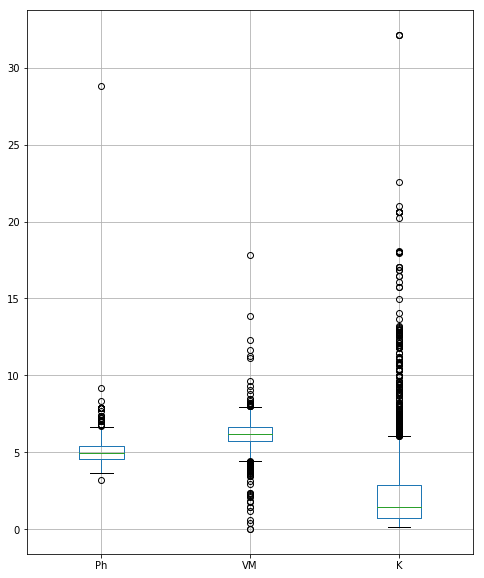

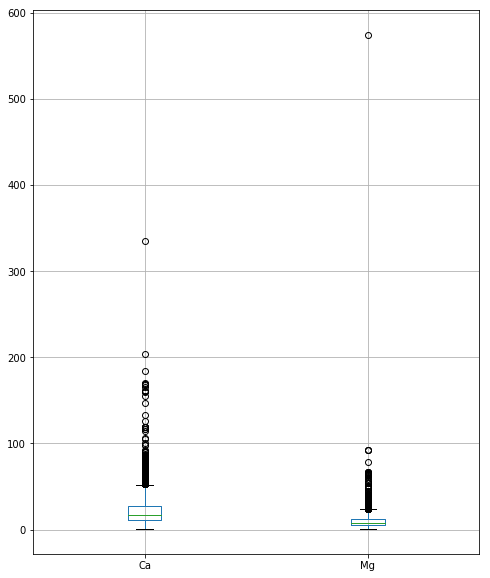

In [10]:
#Extraindo os dados necessários
agro = dataset[['Ph','VM','K','Ca','Mg']]

#Excluindo os Nan
agro = agro.dropna()

agro.boxplot(column=agro.columns[[0,1,2]].tolist(),figsize=(8,10))
plt.show()

agro.boxplot(column=agro.columns[[3,4]].tolist(),figsize=(8,10))
plt.show()

In [11]:
#Analisando os outliers - Ph
dist = 1.5*(agro.Ph.quantile(q=0.75)-agro.Ph.quantile(q=0.5)) + agro.Ph.quantile(q=0.75)


print("Máximo do boxplot para Ph:", dist)

agro[agro.Ph > dist]

Máximo do boxplot para Ph: 6.075000000000001


,Ph,VM,K,Ca,Mg
473,6.45,5.42,1.945,73.500,23.000
524,6.25,5.43,0.435,39.550,15.940
525,6.40,5.30,0.525,38.920,16.180
526,6.40,5.27,0.525,38.920,16.180
527,6.25,5.44,0.435,39.550,15.940
611,6.25,5.14,0.160,24.900,15.000
616,6.25,5.67,0.160,24.900,15.000
618,6.25,5.39,0.160,24.900,15.000
619,6.25,4.92,0.160,24.900,15.000
620,6.10,5.61,0.240,27.450,14.350


In [12]:
#Analisando os outliers - Vm
dist_1 = agro.VM.quantile(q=0.75) + 1.5*(agro.VM.quantile(q=0.75)-agro.VM.quantile(q=0.5))
dist_2 = agro.VM.quantile(q=0.5) - 1.5*(agro.VM.quantile(q=0.75)-agro.VM.quantile(q=0.5))


print("Máximo do boxplot para Ph:", dist)

#agro[(agro.VM < dist_2) | (agro.VM > dist_1)]

Máximo do boxplot para Ph: 6.075000000000001


In [13]:
#Analisando os outliers - K
dist = 1.5*(agro.K.quantile(q=0.75)-agro.K.quantile(q=0.5)) + agro.K.quantile(q=0.75)


print("Máximo do boxplot para K:", dist)

agro[agro.K > dist]

Máximo do boxplot para K: 5.00875


,Ph,VM,K,Ca,Mg
38,4.850,5.51,5.745,17.410,11.745
43,5.075,5.65,6.220,17.280,11.535
51,5.250,5.68,6.325,14.685,12.455
62,5.250,5.55,6.325,14.685,12.455
78,5.250,5.29,6.325,14.685,12.455
79,5.250,5.56,6.325,14.685,12.455
81,5.200,5.40,10.650,10.305,8.625
420,4.850,6.17,5.025,22.595,12.880
421,5.250,6.55,6.695,28.630,17.670
474,5.205,5.95,8.200,48.870,11.655


In [14]:
#Analisando os outliers - Ca
dist = 1.5*(agro.Ca.quantile(q=0.75)-agro.Ca.quantile(q=0.5)) + agro.Ca.quantile(q=0.75)


print("Máximo do boxplot para Ca:", dist)

agro[agro.Ca > dist]

Máximo do boxplot para Ca: 43.145625


,Ph,VM,K,Ca,Mg
414,4.900,6.51,1.875,54.505,11.585
473,6.450,5.42,1.945,73.500,23.000
474,5.205,5.95,8.200,48.870,11.655
475,5.205,5.90,8.200,48.870,11.655
476,5.270,5.85,10.650,46.060,12.725
477,5.940,5.79,8.900,64.290,15.845
478,6.015,5.02,4.800,70.730,17.520
479,6.015,5.66,4.800,70.730,17.520
484,4.800,6.22,3.610,51.510,10.705
485,4.750,6.15,3.580,50.155,12.170


In [15]:
#Analisando os outliers - Mg
dist = 1.5*(agro.Mg.quantile(q=0.75)-agro.Mg.quantile(q=0.5)) + agro.Mg.quantile(q=0.75)


print("Máximo do boxplot para Ca:", dist)

agro[agro.Mg > dist]

Máximo do boxplot para Ca: 19.287499999999994


,Ph,VM,K,Ca,Mg
473,6.45,5.42,1.945,73.500,23.000
596,5.10,4.90,2.875,58.310,23.925
599,5.30,4.42,2.625,44.130,23.230
632,5.60,5.43,1.000,22.355,574.080
640,4.40,5.05,11.950,56.225,29.820
641,4.40,5.17,11.950,56.225,29.820
642,4.40,5.15,12.750,56.370,31.385
646,4.65,4.72,3.780,68.420,21.975
647,4.70,4.28,1.435,59.095,30.450
648,4.70,4.19,1.435,59.095,30.450


### Boxplot - Respostas

#### O boxplot ajuda numa melhor compreensão dos dados?
Sim, como podemos ver, nos boxplots criados existem vários valores que estão fora dos limites.

#### Porque e quando você usaria o boxplot?
O gráfico boxplot deveria ser sempre utilizado para verificar se existem outliers, e para entender melhor os dados. Conforme vimos nos gráficos criados, existem possíveis outliers que antes não tinham sido identificados.

#### De acordo com o boxplot, há outliers nos seus atributos? se sim esses pontos marcados como outliers parecem mesmo outliers? explique. Considere outlier algum tipo de erro, de medição, ou digitação, ou inconsistência nos dados. Por exemplo, se um atributo estiver medindo altura de pessoas e um valor marcado como outlier é 19.5m, provavelmente é um erro de digitação a altura correta deveria ser 1.95m
Pela análise feita existem muitos valores que estão fora dos limites e isso ocorre para vários atributos. Nesse ponto, encontramos vários problemas:

1) Alguns dados foram excluídos com a função dropna(), talvez isso tenha afetado os limites do boxplot. <br>
2) Por estarmos trabalhando com medidas realizadas em solo, é possível que ocorra uma variação muito grande. Além disso, sabemos que as medidas foram realizadas em fazendas diferentes. Talvez seja mais interessante analisar cada uma em separado.

Tais problemas precisam de uma maior investigação, assim como necessitam da opinião de um especialista do domínio dos dados.

## Medida: Intervalo máximo

In [16]:
agro.max()-agro.min()

Ph     25.600
VM     17.850
K      32.025
Ca    334.425
Mg    573.555
dtype: float64

### Intervalo máximo - Respostas

#### O intervalo máximo pode induzir ao erro ao interpretá-lo? Em qual cenário? Mostrar no seu dataset se possível, se não for o caso para o dataset explicar em um cenário que ocorre.
O intervalo máximo é bem sensível a outliers e, conforme vimos no boxplot, existem diversos deles para todos os atributos. Logo, podemos realizar tal medida mas não podemos considerar ela para afirmar algo.

## Medida: Momentos estatísticos

In [17]:
#Calculo dos momentos originais
for i in range(1,5):
    print("Momento original Ph (k =",i,"): ",momento_original(agro.Ph,i))
    print("Momento original Vm (k =",i,"): ",momento_original(agro.VM,i))
    print("Momento original K (k =",i,"):",momento_original(agro.K,i))
    print("Momento original Ca (k =",i,"): ",momento_original(agro.Ca,i))
    print("Momento original Mg (k =",i,"): ",momento_original(agro.Mg,i))
    print('\n')

Momento original Ph (k = 1 ):  5.009688581314879
Momento original Vm (k = 1 ):  6.154697231833907
Momento original K (k = 1 ): 2.3379959630911187
Momento original Ca (k = 1 ):  22.396583044982695
Momento original Mg (k = 1 ):  10.396786332179941


Momento original Ph (k = 2 ):  25.625603777393316
Momento original Vm (k = 2 ):  38.57065077854669
Momento original K (k = 2 ): 13.083439878892756
Momento original Ca (k = 2 ):  895.4578399077282
Momento original Mg (k = 2 ):  276.60993127883535


Momento original Ph (k = 3 ):  137.71991062175607
Momento original Vm (k = 3 ):  246.0950153884085
Momento original K (k = 3 ): 143.7286929548732
Momento original Ca (k = 3 ):  67095.21506607562
Momento original Mg (k = 3 ):  60147.24893708663


Momento original Ph (k = 4 ):  883.6143307673628
Momento original Vm (k = 4 ):  1607.8606535545255
Momento original K (k = 4 ): 2431.118189215787
Momento original Ca (k = 4 ):  9214753.093616791
Momento original Mg (k = 4 ):  31583595.034978885




In [18]:
print("Momento centrado Ph(Média=0): ",agro.Ph.mad())
print("Momento centrado VM(Média=0): ",agro.VM.mad())
print("Momento centrado K(Média=0): ",agro.K.mad())
print("Momento centrado Ca(Média=0): ",agro.Ca.mad())
print("Momento centrado Mg(Média=0): ",agro.Mg.mad())
print('\n')

print("Momento centrado Ph(Var=0): ",agro.Ph.var())
print("Momento centrado VM(Var=0): ",agro.VM.var())
print("Momento centrado K(Var=0): ",agro.K.var())
print("Momento centrado Ca(Var=0): ",agro.Ca.var())
print("Momento centrado Mg(Var=0): ",agro.Mg.var())
print('\n')

print("Momento centrado Ph(Skew=0): ",agro.Ph.skew())
print("Momento centrado VM(Skew=0): ",agro.VM.skew())
print("Momento centrado K(Skew=0): ",agro.K.skew())
print("Momento centrado Ca(Skew=0): ",agro.Ca.skew())
print("Momento centrado Mg(Skew=0): ",agro.Mg.skew())
print('\n')

print("Momento centrado Ph(Kurtosis=0): ",agro.Ph.kurtosis())
print("Momento centrado VM(Kurtosis=0): ",agro.VM.kurtosis())
print("Momento centrado K(Kurtosis=0): ",agro.K.kurtosis())
print("Momento centrado Ca(Kurtosis=0): ",agro.Ca.kurtosis())
print("Momento centrado Mg(Kurtosis=0): ",agro.Mg.kurtosis())
print('\n')

Momento centrado Ph(Média=0):  0.4791191736210055
Momento centrado VM(Média=0):  0.5789316908322458
Momento centrado K(Média=0):  1.7402887513985172
Momento centrado Ca(Média=0):  13.07892897195516
Momento centrado Mg(Média=0):  5.968450738935917


Momento centrado Ph(Var=0):  0.5287765686956505
Momento centrado VM(Var=0):  0.6905518840765577
Momento centrado K(Var=0):  7.619411817693535
Momento centrado Ca(Var=0):  393.9645077326458
Momento centrado Mg(Var=0):  168.56537117354264


Momento centrado Ph(Skew=0):  10.534521693221356
Momento centrado VM(Skew=0):  0.3601881339570451
Momento centrado K(Skew=0):  3.689066593289575
Momento centrado Ca(Skew=0):  3.7627964353148906
Momento centrado Mg(Skew=0):  24.589047063145735


Momento centrado Ph(Kurtosis=0):  330.4801158187757
Momento centrado VM(Kurtosis=0):  20.01684992920436
Momento centrado K(Kurtosis=0):  21.617249293084647
Momento centrado Ca(Kurtosis=0):  30.207757598871506
Momento centrado Mg(Kurtosis=0):  1027.664080197652




### Momentos estatísticos - Respostas

#### Quando é indicado utilizar os momentos estatísticos para EDA?
Os momentos são indicados quando você deseja saber a distribuição dos seus dados. Isto pode ser necessário para que fazer a aplicação de algum método estatístico.

#### Pelos valores dos momentos centrados, os atributos parecem seguir uma distribuição normal (nos slides tem uma indicação de quando um atributo parece seguir uma normal)? Explique.
Analisando o skewness e o kurtosis de cada atributo, verificamos que aparentemente VM, K e Ka seguem uma distribuição normal.

### Reavaliação das Hipóteses

#### Pergunta 1
Depois de analisar a skewness e a kurtosis do Ph numericamente, não temos mais indícios de que sua distribuição é normal. Antes, havíamos avaliado pelo histograma que podería existir uma certa normalidade.<br>

#### Pergunta 2
Após avaliar as análises feitas, podemos dizer com quase certeza que o atributo VM (velocidade média de plantio) possui uma distribuição normal, fato que já havia sido discutido antes.<br>

#### Pergunta 3
Com as medidas realizadas, não foi possível comprovar nenhum relacionamento entre os atributos.<br>

É importante salientar que esta etapa evidenciou diversos problemas, tais como missing values e outliers nos dados. Conforme foi visto no boxplot, são muitos os valores que fogem do padrão. Antes de prosseguir para uma próxima fase (como a construção do modelo), deve-se examinar o porquê de certas observações fugirem do padrão. Isso é fundamental para entender o dataset, assim como para verificar se tais outliers não estão causando ruído nas estatísticas descritivas.

### -------------------------------------------------------------------------------------------------------------------------------------------